# An Introduction to Plotting and Data Analysis in Python 5

Clyde Fare and João Pedro Malhado, Imperial College London (contact: [python@imperial.ac.uk](python@imperial.ac.uk))

Exercise 1 uses material adapted from work by Paul Wilde. Exercise 2 is adapted and uses the dataset from the article <a href="http://dx.doi.org/10.2307/2682899">F. J. Anscombe, The American Statistician, 27(1):17-21 (1973)</a>. This notebook is licensed under a [Creative Commons Attribution 4.0 (CC-by) license](http://creativecommons.org/licenses/by/4.0/)

Let's load the pylab and non-linear fitting machinery and get that out of the way.

In [1]:
%pylab inline
import scipy.optimize

Populating the interactive namespace from numpy and matplotlib


In [17]:
from scipy.optimize import curve_fit

## Exercise 1

In this exercise we will be studying the kinetics of the decomposition reaction of $N_2 O_5$

$$2 N_2 O_{5 (g)} \longrightarrow 4NO_{2 (g)} + O_{2 (g)}$$

The rate of a chemical reaction is how fast the concentration of one of the reactants or products changes during the chemical reaction. In the case of the reaction under study the rate of the reaction is proportional to the concentration of $N_2 O_5$, it is said to obey a first order rate law:

$$rate=- \frac{d[N_2 O_5]}{d t} =k [N_2 O_5] ,$$

where $k$ is the *rate constant*. This is a differential equation and its solution gives us the concentration of $N_2 O_5$ as a function of time.

$$[N_2 O_5]=[N_2 O_5]_0 e^{-k t}￼$$

where $[N_2 O_5]_0$ is the initial concentration and $t$ is the time. (If you want to know where the solution comes from click [here](https://wiki.ch.ic.ac.uk/wiki/index.php?title=Solving_the_Rate_Equation).)

We are interested in determining the value of the rate constant $k$. In order to do this, the concentration of $N_2 O_5$ was recorded as a function of time at $65^{\circ}C$, and stored in file [N2O5vst_65C.dat](files/N2O5vst_65C.dat), where the first column is time in seconds and the second column is concentration in $\text{mol.dm}^{-3}$.

* Load the data and plot the concentration of $N_2 O_5$ against time, label the axes and include the units in the label.

In [2]:
data=loadtxt('N2O5vst_65C.dat')

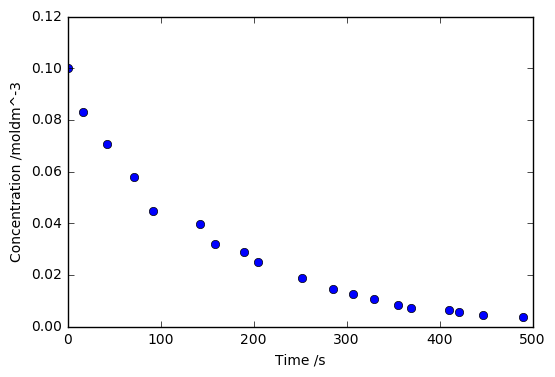

In [3]:
data_time=data[:,0]
data_conc=data[:,1]
plot(data[:,0], data[:,1], linestyle='', marker='o')
xlabel("Time /s")
ylabel("Concentration /moldm^-3")
show()

* Create an appropriate python function for the variation of $[N_2 O_5]$ with time that through non linear fitting will allow us to extract the rate constant

* Fit the function to the data and report the value of the rate constant and the uncertainty associated with it. 

* Superimpose the fit with the experimental data to check your fit is meaningful.

In [29]:
def expon(x,k,a):
    "Exponential fitting data for [N2O5]"
    return a*e**(-k*x)

In [30]:
curvy=curve_fit(expon, data_time, data_conc)

C:\anaconda\lib\site-packages\ipykernel\__main__.py:3: RuntimeWarning: overflow encountered in power
  app.launch_new_instance()


In [31]:
cparams=curvy[0]
cparams

array([ 0.00675609,  0.09547051])

In [32]:
a=cparams[1]
k=cparams[0]

In [36]:
unc=curvy[1]
unc1=unc**0.5
unck=unc1[0,0]
unck

0.00018612758934987529

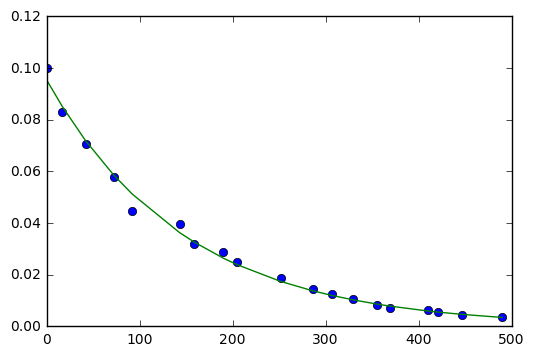

In [33]:
yt=a*e**(-k*data_time)
plot(data_time, data_conc, marker='o', linestyle='')
plot(data_time,yt, linestyle='-', marker='')
show()

Some other colleagues followed the same procedure as above but at different temperatures. The following table shows values of the rate constant and its uncertainty for different temperatures.

<table>
<tr><th>$T/^{\circ} C$</th><th>$k/s^{-1}$</th><th>$\sigma_k/s^{-1}$</th><tr>
<tr><td>20</td><td>0.0000188</td><td>0.0000089</td></tr>
<tr><td>30</td><td>0.0000694</td><td>0.0000073</td></tr>
<tr><td>40</td><td>0.000260</td><td>0.000023</td></tr>
<tr><td>50</td><td>0.000888</td><td>0.000067</td></tr>
<tr><td>60</td><td>0.00293</td><td>0.00021</td></tr>
</table>

The variation of the rate constant with temperature can give important information about the chemical reaction. The rate constant of an elementary reaction varies in general with temperature according to the Arrhenius equation that you will cover in more detail in your kinetics lectures

$$k(T)=A e^{-\frac{E_a}{R T}} ,$$

where $E_a$ is activation energy, $A$ is the so called pre-exponential factor (which is related to the frequency of molecular collisions) and $R$ is the ideal gas constant.

* Create an appropriate function that through non linear fitting will allow us to extract the pre-exponential factor and the activation energy.

* From the rate constant values on the table above, and the rate constant value you have determined, fit the data to the determine the pre-exponential factor and the activation energy for this reaction. 

* Plot values predicted from your fitted function alongside the experimental values to visualise your result.

*Note 1*: The uncertainties associated with each rate constant are different, you should take this into account. 

*Note 2*: Units of temperature must be consistent with units of R.

In [37]:
def rct(T,A,Ea):
    "k(T)"
    return A*e**(-Ea/(8.314*T))

In [50]:
temp2=linspace(293,335,100)
temp=array([293,303,313,323,333])
kta=array([0.0000188,0.0000694,0.000260,0.000888,0.00293])
kerr=array([0.0000089,0.0000073,0.000023,0.000067,0.00021])

In [51]:
curvek=curve_fit(rct,temp,kta,sigma=kerr)

In [52]:
kparams=curvek[0]
kparams

array([  7.04766748e+13,   1.04457055e+05])

In [56]:
A=kparams[0]
Ea=kparams[1]
Ea

104457.05467244275

In [101]:
A

70476674843556.172

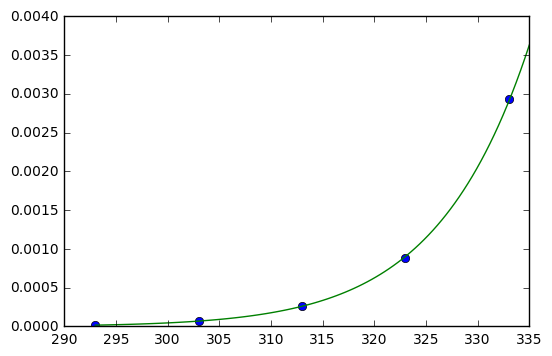

In [55]:
yk=A*e**(-Ea/(8.314*temp2))
plot(temp,kta,marker='o', linestyle='')
plot(temp2,yk, marker='', linestyle='-')
show()

If you are having difficulties finding a suitable initial guess for the non-linear Arrhenius fit, or if you managed to extract your activation energy quickly try a different approach:

The Arrhenius equation is a non-linear function of $T$, but can be converted into a linear form by taking the natural logarithm of both sides of the equation:

$$\ln(k)=\ln(A)-\frac{E_a}{R}\frac{1}{T} .$$

We obtain a linear relationship between $\ln(k)$ and $\frac{1}{T}$, where the intercept is $\ln(A)$ and the slope $-\frac{E_a}{R}$. It should be noted that it is only possible in a few cases to transform a non-linear equation into a linear one in this way.

* Plot $\ln(k)$ against $\frac{1}{T}$
* Use polyfit to extract the gradient and intercept of the $\ln(k)$ vs. $\frac{1}{T}$ data (ignore any uncertainties associated with the data when performing this fit) 
* Use these to determine the activation energy and the pre-exponential factor. 
* How do your results compare with the non-linear fit above?

In [93]:
lk=log(kta)
rt=1/temp

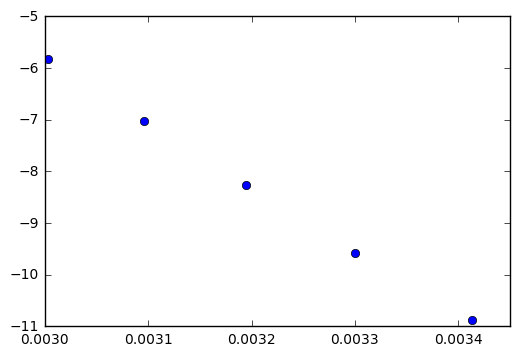

In [94]:
plot(rt,lk,linestyle='', marker='o')
show()

In [95]:
pol=polyfit(rt, lk, 1)

In [98]:
pol

array([-12339.15860426,     31.18871176])

In [99]:
activation_energy=-pol[0]*8.314
activation_energy

102587.76463581134

In [100]:
preexponential_factor=e**pol[1]
preexponential_factor

35082086328474.43

In [ ]:
#Ea is roughly the same, but A is about half the value of the curve above

In the previous question we performed a fit without taking the uncertainties associated with the data into account. This is equivalent to considering all the $\ln(k)$ data points have the same uncertainty. From the $T$ vs $k$ table above we know this is not the case, and we should take the uncertainties into account. Note however that $\sigma_k$ is not the same as $\sigma_{\ln(k)}$, and also $\sigma_{\ln(k)}\neq\ln(\sigma_k)$! There are [general methods](http://en.wikipedia.org/wiki/Propagation_of_uncertainty#Simplification) to propagate the uncertainty of a value upon a mathematical operation. For the present purposes however, we will focus on the case of the logarithm at hand:

$$\sigma_{\ln(k)}=\frac{\sigma_k}{k} .$$

* Plot the values of $\ln(k)$ as a function of $\frac{1}{T}$ with appropriate error bars. Note the values of the error bars at low $T$ values. What do you expect the relative contribution of these data points to the linear fit to be?

* Fit the data taking into account the error bars (recall the differences between functions *polyfit* and *curve_fit* in dealing with data point uncertainty). How do the results obtained via this procedure compare with the ones obtained via direct exponential fit?

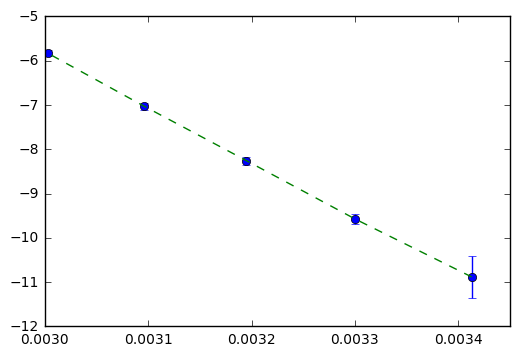

In [107]:
lnsigm=kerr/kta
errorbar(rt,lk,marker='o',linestyle='',yerr=lnsigm)
plot(rt, lk,marker='', linestyle='--')
show()

In [108]:
lin=polyfit(rt,lk,1,cov=True, w=1/(lnsigm**2))
lparams=lin[0]
lparams

array([-12602.77743043,     32.00585773])

In [110]:
Ea2=-lparams[0]*8.314
Ea2

104779.4915565596

In [111]:
k2=e**(lparams[1])
k2

79426861171184.891

In [ ]:
#This is now much closer to the curve values of k and Ea

## Exercise 2

The dataset in the CSV file <a href="anscombe.csv">anscombe.csv</a> is formed by 4 sets of x and y values in the form

<table>
<tr><td colspan=2>Set 1</td><td colspan=2>Set 2</td><td colspan=2>Set 3</td><td colspan=2>Set 4</td></tr>
<tr><td>x</td><td>y</td><td>x</td><td>y</td><td>x</td><td>y</td><td>x</td><td>y</td></tr>
</table>

* Load the data onto the notebook
* Calculate the mean of x and y for all sets

In [61]:
data=loadtxt('anscombe.csv', delimiter=',')
data

array([[ 10.  ,   8.04,  10.  ,   9.14,  10.  ,   7.46,   8.  ,   6.58],
       [  8.  ,   6.95,   8.  ,   8.14,   8.  ,   6.77,   8.  ,   5.76],
       [ 13.  ,   7.58,  13.  ,   8.74,  13.  ,  12.74,   8.  ,   7.71],
       [  9.  ,   8.81,   9.  ,   8.77,   9.  ,   7.11,   8.  ,   8.84],
       [ 11.  ,   8.33,  11.  ,   9.26,  11.  ,   7.81,   8.  ,   8.47],
       [ 14.  ,   9.96,  14.  ,   8.1 ,  14.  ,   8.84,   8.  ,   7.04],
       [  6.  ,   7.24,   6.  ,   6.13,   6.  ,   6.08,   8.  ,   5.25],
       [  4.  ,   4.26,   4.  ,   3.1 ,   4.  ,   5.39,  19.  ,  12.5 ],
       [ 12.  ,  10.84,  12.  ,   9.13,  12.  ,   8.15,   8.  ,   5.56],
       [  7.  ,   4.82,   7.  ,   7.26,   7.  ,   6.42,   8.  ,   7.91],
       [  5.  ,   5.68,   5.  ,   4.74,   5.  ,   5.73,   8.  ,   6.89]])

In [67]:
m=mean(data, axis=0)
m

array([ 9.        ,  7.50090909,  9.        ,  7.50090909,  9.        ,
        7.5       ,  9.        ,  7.50090909])

* Do a linear fit of y against x for each set. (You may want to define a function that receives the data, does the fit, and returns an array with the desired parameters.)

In [65]:
x1=data[:,0]
y1=data[:,1]
x2=data[:,2]
y2=data[:,3]
x3=data[:,4]
y3=data[:,5]
x4=data[:,6]
y4=data[:,7]
arange=data[]

In [69]:
poly1=polyfit(x1,y1,1, cov=True)
poly2=polyfit(x2,y2,1,cov=True)
poly3=polyfit(x3,y3,1,cov=True)
poly4=polyfit(x4,y4,1,cov=True)

In [71]:
p1=poly1[0]
p2=poly2[0]
p3=poly3[0]
p4=poly4[0]

In [72]:
m1=p1[0]
c1=p1[1]
m2=p2[0]
c2=p2[1]
m3=p3[0]
c3=p3[1]
m4=p4[0]
c4=p4[1]

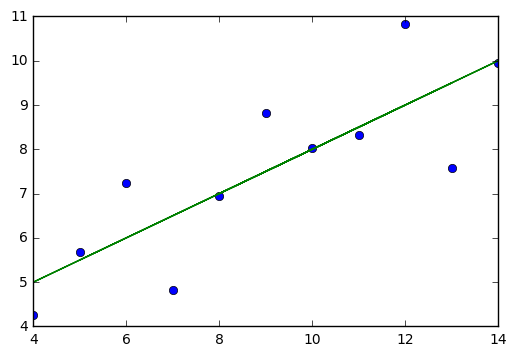

In [73]:
fit1=m1*x1+c1
fit2=m2*x2+c2
fit3=m3*x3+c3
fit4=m4*x4+c4

plot(x1,y1,marker='o', linestyle='')
plot(x1,fit1, marker='', linestyle='-')
show()

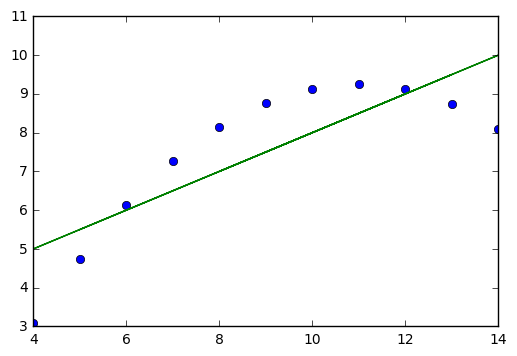

In [74]:
plot(x2,y2,marker='o', linestyle='')
plot(x2,fit2, marker='', linestyle='-')
show()

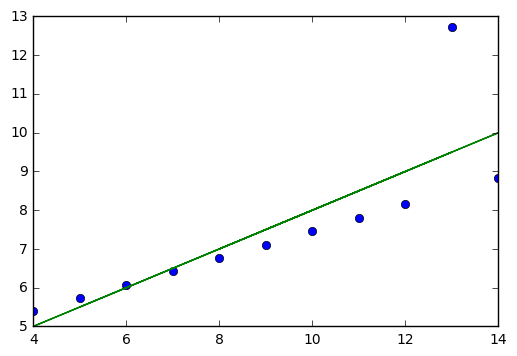

In [77]:
plot(x3,y3,marker='o', linestyle='')
plot(x3,fit3, marker='', linestyle='-')
show()

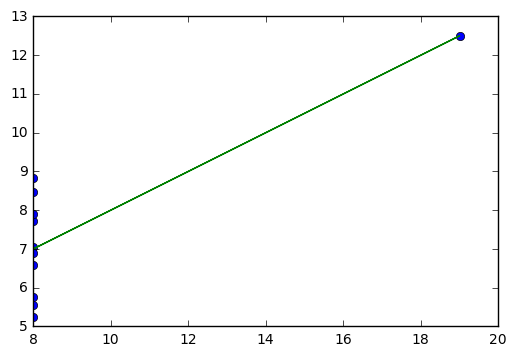

In [78]:
plot(x4,y4,marker='o', linestyle='')
plot(x4,fit4, marker='', linestyle='-')
show()

* To better organize the data, create an array of the form:

$$\begin{align}\text{array}([&[\bar{x}_1,\bar{y}_1,m_1,b_1],\\&[\bar{x}_2,\bar{y}_2,m_2,b_2],\\&...])\end{align}$$

where m<sub>1</sub>, b<sub>1</sub>, etc. are respectively the slope and intercept of the fit to data set 1

In [80]:
d=array([[m[0],m[1],m1,c1],[m[2],m[3],m2,c2],[m[4],m[5],m3,c3],[m[6],m[7],m4,c4]])
d

array([[ 9.        ,  7.50090909,  0.50009091,  3.00009091],
       [ 9.        ,  7.50090909,  0.5       ,  3.00090909],
       [ 9.        ,  7.5       ,  0.49972727,  3.00245455],
       [ 9.        ,  7.50090909,  0.49990909,  3.00172727]])

Compare the values you obtained for each data set. Based on your analysis so far, could you conclude that the four sets of data correspond to the same experiment and agree with each other?

* Plot your data along with your linear fit in each case.

Would you now reach the same conclusion to the question above?

*Conclusion: You should always plot your data! Do not blindly rely on statistical measures.*

For which of the datasets is the linear fit meaningful? Plotting the residuals helps you answering this question.

In [81]:
res1=fit1-y1
res2=fit2-y2
res3=fit3-y3
res4=fit4-y4

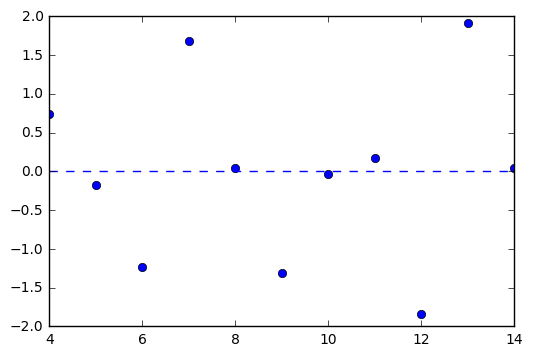

In [88]:
plot(x1, res1, marker='o', linestyle='')
axhline(0, linestyle='--')
show()

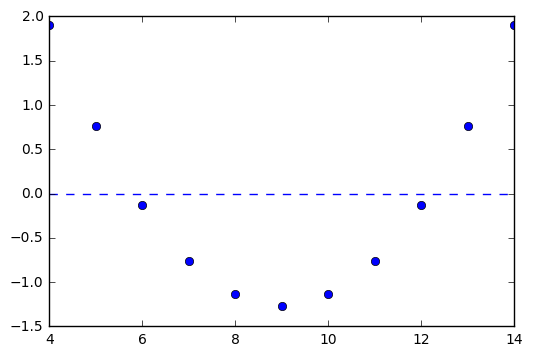

In [89]:
plot(x2, res2, marker='o', linestyle='')
axhline(0, linestyle='--')
show()

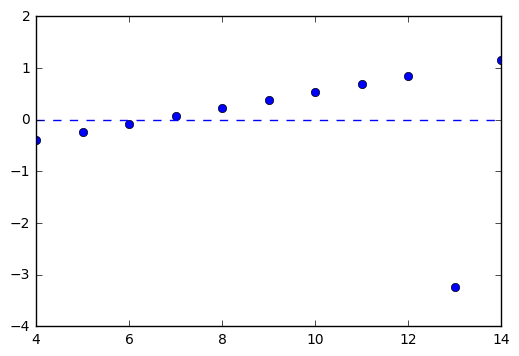

In [90]:
plot(x3, res3, marker='o', linestyle='')
axhline(0, linestyle='--')
show()

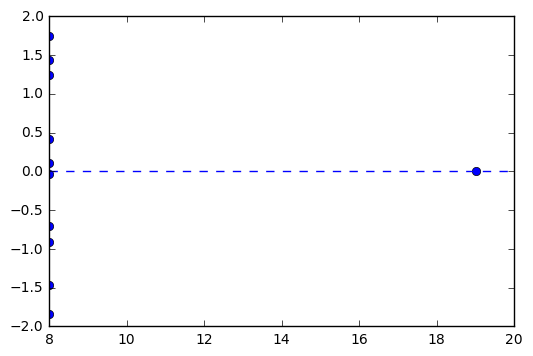

In [91]:
plot(x4, res4, marker='o', linestyle='')
axhline(0, linestyle='--')
show()

In [ ]:
#Plot 3 looks to be the most meaningful as it is very linear with only one major outlier.